In [7]:
# libraries
import pandas as pd 
import numpy as np 
import os 
import pickle as pkl
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.patches as patches
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
from matplotlib import colors as clrs
import matplotlib.lines as lines
from matplotlib.ticker import FormatStrFormatter
import sys
sys.path.append("../models")
from functions import import_country

plt.rcParams['axes.linewidth'] = 0.3
plt.rcParams['xtick.major.width'] = 0.3
plt.rcParams['ytick.major.width'] = 0.3
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['xtick.minor.width'] = 0.2
plt.rcParams['ytick.minor.width'] = 0.2
plt.rcParams['xtick.minor.size'] = 1.5
plt.rcParams['ytick.minor.size'] = 1.5

font_dirs = ['./fonts/Bai_Jamjuree/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
font_list = font_manager.createFontList(font_files)
font_manager.fontManager.ttflist.extend(font_list)
plt.rcParams['font.family'] = 'Bai Jamjuree'
plt.rcParams['font.sans-serif'] = 'Bai Jamjuree'

colors = ['#6CC2BD', '#5A809E', '#7C79A2', '#F57D7C', '#FFC1A6', '#FEE4C4']
markers = ["o", "s", "^", "*", "P", "d"]
props = dict(facecolor='grey', alpha=0.1, linewidth=0.3)

import warnings
warnings.filterwarnings("ignore")

alpha_s    = [0, 1, 10, 100, 1000]
countries  = ["Italy", "Canada", "Serbia", "Ukraine", "Egypt", "Peru"]
r          = 1.5
VE         = 0.9
rVs        = [0.1 / 100, 0.5 / 100, 1.0 / 100]
vaccination_strategies = ["old_first", "homogeneous", "20-49_first"]
model      = "vaccine_rate"

# import data 
with open("../output/rollout_speed.pkl", "rb") as file:
    data = pkl.load(file)  

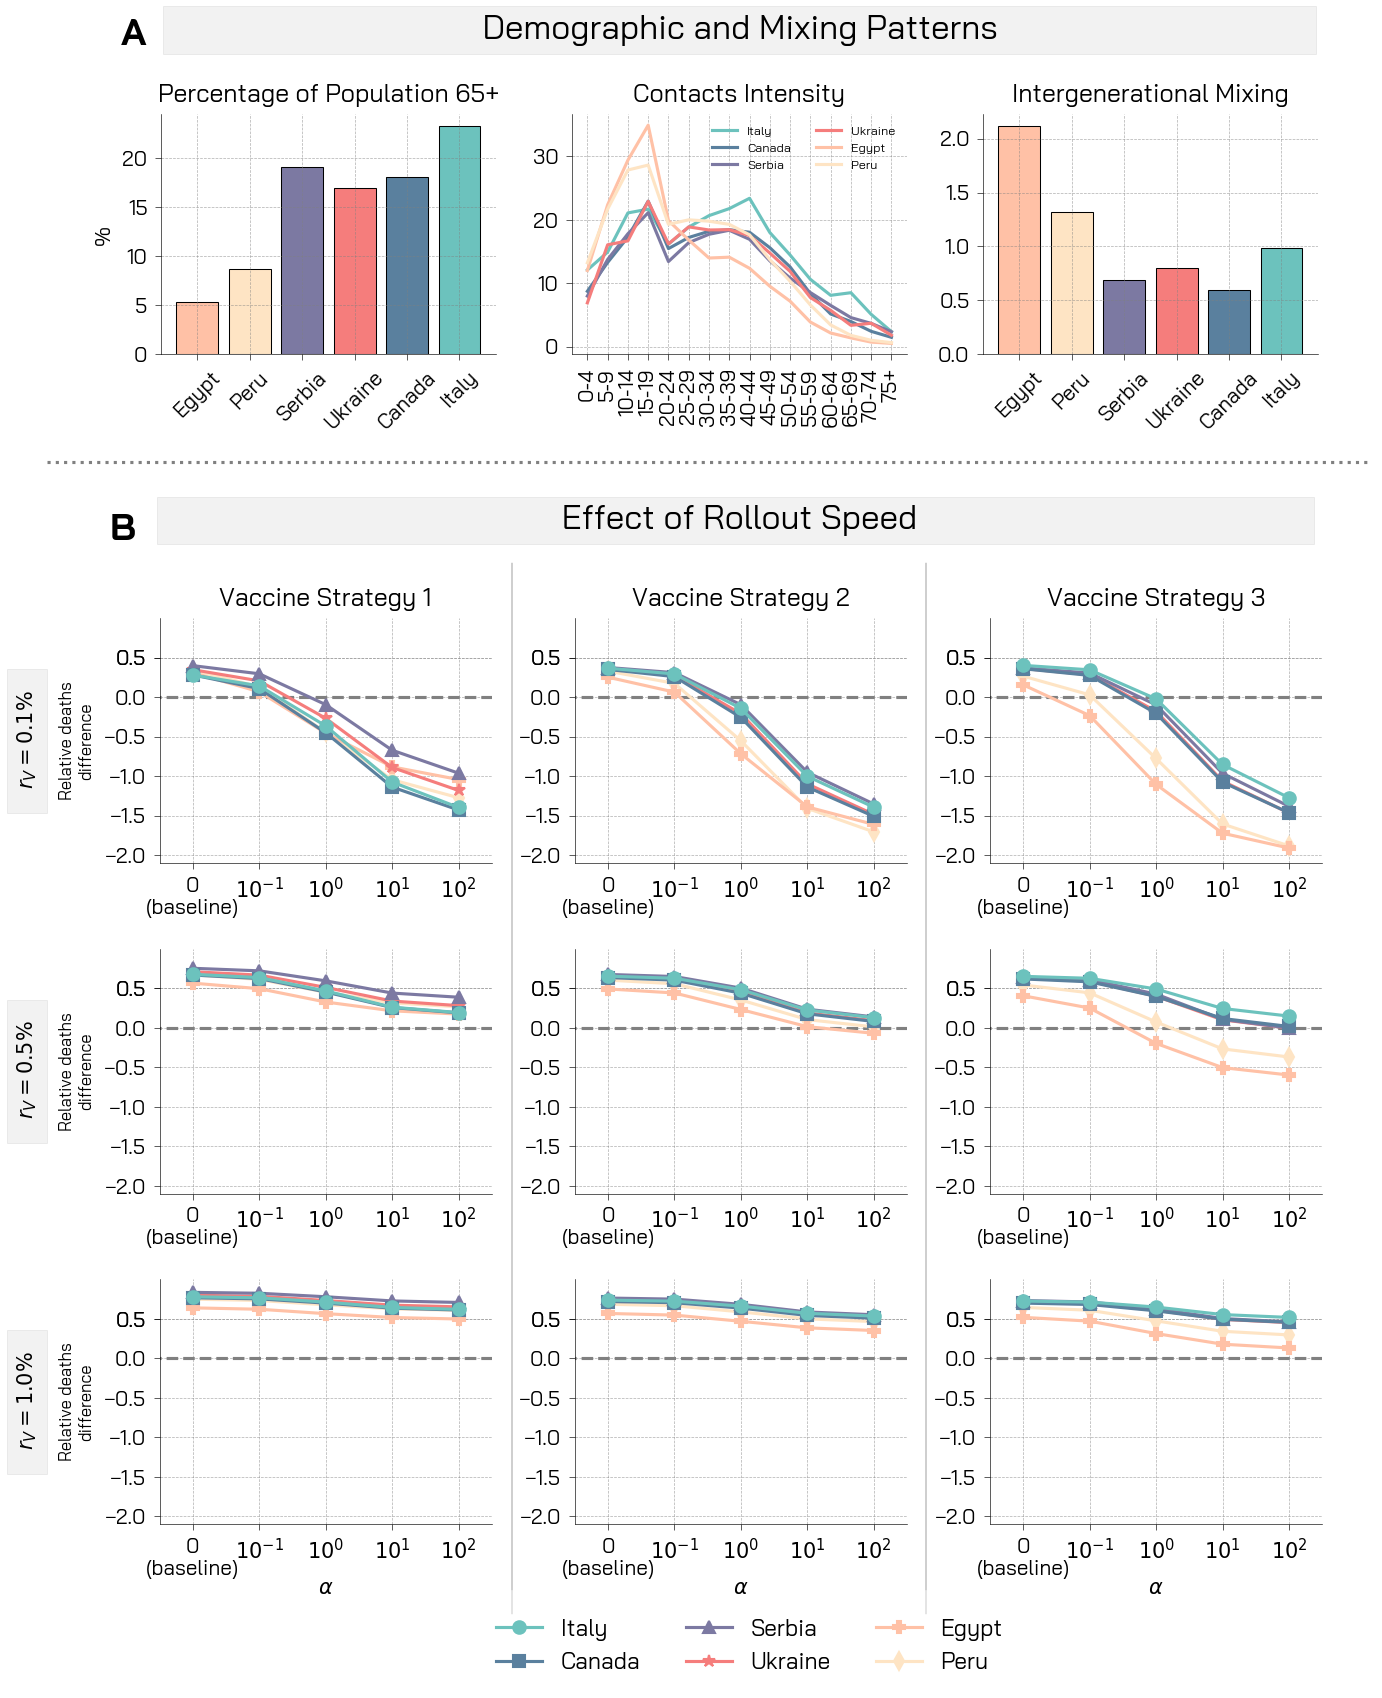

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,8), dpi=150)
plt.subplots_adjust(hspace=0.35, wspace=0.25)

for i in range(len(rVs)):
    for j in range(len(countries)):
        country = countries[j]
        axes[i, 2].plot(range(len(alpha_s)), data[country][rVs[i]]["20-49_first"], color=colors[j], marker=markers[j], label=country, zorder=int(50 * 1 / (j + 1)))
        axes[i, 1].plot(range(len(alpha_s)), data[country][rVs[i]]["homogeneous"], color=colors[j], marker=markers[j], zorder=int(50 * 1 / (j + 1)))
        axes[i, 0].plot(range(len(alpha_s)), data[country][rVs[i]]["old_first"], color=colors[j], marker=markers[j], label=country, zorder=int(50 * 1 / (j + 1)))
        
        
#axes[2, 0].set_ylabel("Relative deaths difference", fontsize=12)
for ax in axes.ravel():
    ax.grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.6, axis="both")
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.hlines(0, -0.9, 4.5, linestyle="--", color="gray")
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-2.1, 1.0)
    ax.set_xticks([0, 1, 2, 3, 4])
    ax.set_yticks([-2, -1.5, -1, 0.5, 0, -0.5, 0.5])
    ax.set_xticklabels(["0\n(baseline)", "$10^{-1}$", "$10^0$", "$10^1$", "$10^2$"], rotation=0, fontsize=10)
    

axes[0, 0].set_title("Vaccine Strategy 1")
axes[0, 1].set_title("Vaccine Strategy 2")
axes[0, 2].set_title("Vaccine Strategy 3")

axes[2,0].set_xlabel("$\\alpha$", fontsize=10, y=1.5, labelpad=0)
axes[2,1].set_xlabel("$\\alpha$", fontsize=10, y=1.5, labelpad=0)
axes[2,2].set_xlabel("$\\alpha$", fontsize=10, y=1.5, labelpad=0)

axes[0,0].set_ylabel("Relative deaths\ndifference", fontsize=8)
axes[1,0].set_ylabel("Relative deaths\ndifference", fontsize=8)
axes[2,0].set_ylabel("Relative deaths\ndifference", fontsize=8)

axes[0, 0].annotate("   $r_{V}=0.1\%$   ", xy=(-0.4, 0.24), xycoords='axes fraction', bbox=props, rotation=90, fontsize=10, va='bottom', ha='center')
axes[1, 0].annotate("   $r_{V}=0.5\%$   ", xy=(-0.4, 0.24), xycoords='axes fraction', bbox=props, rotation=90, fontsize=10, va='bottom', ha='center')
axes[2, 0].annotate("   $r_{V}=1.0\%$   ", xy=(-0.4, 0.24), xycoords='axes fraction', bbox=props, rotation=90, fontsize=10, va='bottom', ha='center')

axes[2,2].legend(ncol=3, bbox_to_anchor=[0.1,-0.3,0,0], fontsize=11, frameon=False)
axes[0, 0].annotate("                                              Effect of Rollout Speed                                             ", 
                    xy=(3.45, 1.4), xycoords='axes fraction', bbox=props, rotation=0, fontsize=16, va='center', ha='right')

fig.add_artist(lines.Line2D([0.36,0.36], [0.07, 0.926], color="gray", linewidth=0.2))
fig.add_artist(lines.Line2D([0.636,0.636], [0.07, 0.926], color="gray", linewidth=0.2))

ins1 = fig.add_axes([0.126, 1.1, 0.223, 0.2])
ins2 = fig.add_axes([0.4, 1.1, 0.223, 0.2])
ins3 = fig.add_axes([0.4 + (0.4 - 0.126), 1.1, 0.223, 0.2])

i = 0
countries_ins1 = ["Egypt", "Peru", "Serbia", "Ukraine", "Canada", "Italy"]
colors_ins1 = ['#FFC1A6', '#FEE4C4', '#7C79A2', '#F57D7C', '#5A809E', '#6CC2BD']
markers = ["o", "s", "^", "*", "P", "d"]
props = dict(facecolor='grey', alpha=0.1, linewidth=0.3)
for country in countries_ins1:
    # import country
    country_dict = import_country(country, "../../data/countries/")
    ins1.bar([i], 100 * country_dict["Nk"][13:].sum() / country_dict["Nk"].sum(), color=colors_ins1[i], edgecolor="black", linewidth=0.5)
    i += 1
    
ins1.set_xticks([0,1,2,3,4,5])
ins1.set_xticklabels(countries_ins1, rotation=45, size=10)
ins1.tick_params(axis="y", labelsize=10)
ins1.set_title("Percentage of Population 65+", size=12)
ins1.set_ylabel("%")
ins1.grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.6, axis="both")
ins1.spines['top'].set_visible(False)
ins1.spines['right'].set_visible(False)

i = 0
series = []
for country in ["Italy", "Canada", "Serbia", "Ukraine", "Egypt", "Peru"]:
    
    # import country
    country_dict = import_country(country, "../../data/countries/")
    C = country_dict["contacts_home"] + country_dict["contacts_work"] + \
        country_dict["contacts_school"] + country_dict["contacts_other_locations"]

    series.append(C.sum(axis=0))
    ins2.plot(range(16), C.sum(axis=0), color=colors[i], label=country)
    
    i += 1
ins2.legend(frameon=False, loc="upper right", ncol=2, fontsize=6)

ins2.set_xticks(range(16))
ins2.set_xticklabels(["0-4", "5-9", '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', 
                      '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', "75+"], rotation=90, size=10)
ins2.tick_params(axis="y", labelsize=10)
ins2.set_title("Contacts Intensity", size=12)
ins2.grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.6, axis="both")
ins2.spines['top'].set_visible(False)
ins2.spines['right'].set_visible(False)


i = 0
countries_ins3 = ["Egypt", "Peru", "Serbia", "Ukraine", "Canada", "Italy"]
colors_ins3 = ['#FFC1A6', '#FEE4C4', '#7C79A2', '#F57D7C', '#5A809E', '#6CC2BD']

for country in countries_ins3:
    
    # import country
    country_dict = import_country(country, "../../data/countries/")
    C = country_dict["contacts_home"] + country_dict["contacts_work"] + \
        country_dict["contacts_school"] + country_dict["contacts_other_locations"]
    
    ins3.bar([i], ((country_dict["Nk"][0:9] * C[0:9, 13:].sum(axis=1)).sum()) / country_dict["Nk"][13:].sum(),
             color=colors_ins3[i], edgecolor="black", linewidth=0.5)
    i += 1

ins3.set_xticks(range(6))
ins3.set_xticklabels(countries_ins3, rotation=45, size=10)
ins3.tick_params(axis="y", labelsize=10)
ins3.set_title("Intergenerational Mixing", size=12)
ins3.grid(color='grey', linestyle='--', linewidth=0.35, alpha=0.6, axis="both")
ins3.spines['top'].set_visible(False)
ins3.spines['right'].set_visible(False)

fig.add_artist(lines.Line2D([0.05, 0.93], [1.01, 1.01], linestyle="dotted", color="gray"))
ins1.annotate("                                    Demographic and Mixing Patterns                                    ", 
                    xy=(1.73, 1.35), xycoords='axes fraction', bbox=props, rotation=0, fontsize=16, va='center', ha='center');
fig.add_artist(lines.Line2D([0.36,0.36], [0.05, 0.926], color="gray", linewidth=0.2))
fig.add_artist(lines.Line2D([0.636,0.636], [0.05, 0.926], color="gray", linewidth=0.2))
plt.subplots_adjust(hspace=0.35, wspace=0.25)

ins1.annotate("A", xy=(-0.12, 1.33), xycoords='axes fraction', fontsize=18, va='center', ha='left', weight="bold")
axes[0,0].annotate("B", xy=(-0.15, 1.36), xycoords='axes fraction', fontsize=18, va='center', ha='left', weight="bold")


plt.savefig("./img/rollout_speed.pdf", bbox_inches="tight")